In [2]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#list of tv show titles to query
tv_shows = ["Wolf Like Me", "The Tourist", "Troppo", "Wentworth", "Farscape"]

#build query url
url = "https://api.tvmaze.com/search/shows?q="

#create empty lists for appending
tv_name = []
tv_rating = []

In [5]:
#Check the data structure with an example
response = requests.get(url + "Girls").json()
print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "score": 0.9088788,
        "show": {
            "_links": {
                "previousepisode": {
                    "href": "https://api.tvmaze.com/episodes/1079686"
                },
                "self": {
                    "href": "https://api.tvmaze.com/shows/139"
                }
            },
            "averageRuntime": 30,
            "dvdCountry": null,
            "ended": "2017-04-16",
            "externals": {
                "imdb": "tt1723816",
                "thetvdb": 220411,
                "tvrage": 30124
            },
            "genres": [
                "Drama",
                "Romance"
            ],
            "id": 139,
            "image": {
                "medium": "https://static.tvmaze.com/uploads/images/medium_portrait/31/78286.jpg",
                "original": "https://static.tvmaze.com/uploads/images/original_untouched/31/78286.jpg"
            },
            "language": "English",
            "name": "Girls",
          

In [7]:
# make iterative requests to TVmaze search endpoint
for i in tv_shows:
    response = requests.get(url + i).json()
    tv_name.append(response[0]["show"]["name"])
    tv_rating.append(response[0]["show"]["rating"]["average"])

In [8]:
#Print the results
print(f'TV Show Names: {tv_name}')
print(f'TV Show Ratings: {tv_rating}')

TV Show Names: ['Wolf Like Me', 'The Tourist', 'Troppo', 'Wentworth', 'Farscape']
TV Show Ratings: [7.5, 6.7, 6.7, 8.3, 8.6]


In [9]:
# create dataframe
tv_dict = {
    "TV Show Name": tv_name,
    "TV Show Average Rating": tv_rating
}

tv_df = pd.DataFrame(tv_dict)
tv_df

,TV Show Name,TV Show Average Rating
0,Wolf Like Me,7.5
1,The Tourist,6.7
2,Troppo,6.7
3,Wentworth,8.3
4,Farscape,8.6


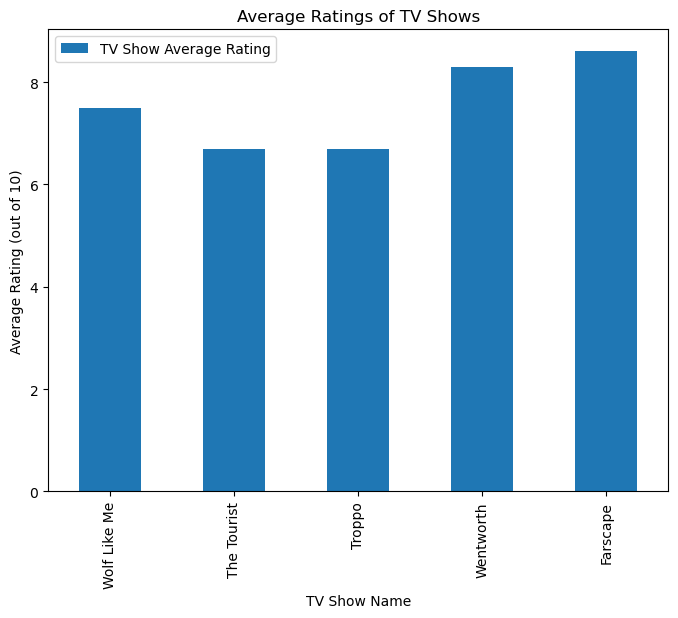

In [12]:
# use pandas to create a bar chart from the dataframe
figure1 = tv_df.plot(kind="bar", figsize = (8,6), title="Average Ratings of TV Shows")
figure1.set_xlabel("TV Show Name")
figure1.set_ylabel("Average Rating (out of 10)")
figure1.set_xticklabels(tv_df["TV Show Name"])

#Save and display figure
plt.show()